In [ ]:
# Mount Drive Folder to Colab [Local]

from google.colab import drive
drive.mount("/content/gdrive")

!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolo26
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/My Drive/yolo26
images	     __pycache__     yolo26m-onnx-seg.ipynb  yolo26m-seg.pt
__init__.py  reuseUtiles.py  yolo26m-seg.onnx


In [ ]:
!pip3 -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import math
import matplotlib.pyplot as plt

In [ ]:
input_model = "yolo26m-seg.pt"
onnx_file = "yolo26m-seg.onnx"
test_image = "/content/gdrive/MyDrive/yolo26/images/travelers.jpg"
image_list = [
    os.path.join("/content/gdrive/MyDrive/yolo26/images/", f)
    for f in os.listdir("/content/gdrive/MyDrive/yolo26/images/")
    if f.lower().endswith((".jpg", ".png", ".jpeg"))
]

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO(input_model)

In [ ]:
model.export(format="onnx")

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO26m-seg summary (fused): 149 layers, 23,569,148 parameters, 0 gradients, 121.5 GFLOPs

PyTorch: starting from 'yolo26m-seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 300, 38), (1, 32, 160, 160)) (52.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 313ms
Prepared 6 packages in 2.17s
Installed 6 packages in 411ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.1
 + onnxruntime==1.23.2
 + onnxslim==0.1.82

requirements: AutoUpdate success ✅ 3.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export wit

/usr/local/lib/python3.12/dist-packages/torch/onnx/_internal/torchscript_exporter/utils.py:1447: OnnxExporterWarning: Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/onnx/_internal/torchscript_exporter/symbolic_opset9.py:5353: UserWarning: Exporting aten::index operator of advanced indexing in opset 22 is achieved by combination of multiple ONNX operators, including Reshape, Transpose, Concat, and Gather. If indices include negative values, the exported graph will produce incorrect results.
  warnings.warn(


ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 11.6s, saved as 'yolo26m-seg.onnx' (90.2 MB)

Export complete (18.2s)
Results saved to /content/gdrive/MyDrive/yolo26
Predict:         yolo predict task=segment model=yolo26m-seg.onnx imgsz=640 
Validate:        yolo val task=segment model=yolo26m-seg.onnx imgsz=640 data=/home/lq/codes/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'yolo26m-seg.onnx'

In [ ]:
!pip3 -q install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
import onnxruntime as ort
import numpy as np
import time

In [ ]:
coco_labels = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

In [ ]:
image = cv2.imread(test_image)
img_resized = cv2.resize(image, (640, 640))

input_img = img_resized / 255.0
input_img = input_img.transpose(2, 0, 1)
input_tensor = input_img[np.newaxis, :, :, :].astype(np.float32)

session = ort.InferenceSession(onnx_file, providers=ort.get_available_providers())
input_name = session.get_inputs()[0].name

start = time.perf_counter()
results = session.run(None, {input_name: input_tensor})
end = time.perf_counter()

# Post-process outputs
for i, rt in enumerate(results):
    print(f"Result {i+1} >> {rt.shape}")

print("")
print(f"Execute time: {(end-start):.2f} ms")
print("")

print(f"det >>> {results[0][0,0][:10]}")
print(len(results[0][0]))


# --------------------- Detection ----------------
print("")
final_det = []
for i in range(len(results[0][0])):
  det = results[0][0,i][:10]
  score = det[4]

  if score >= 0.4:
    final_det.append(det)

print(len(final_det))

# --------------------- Instance Segmentation ----------------
print("")
final_seg = []
print(len(results[1][0]))
print(f"inst >>> {results[1][0][0,0][:10]}")




Result 1 >> (1, 300, 38)
Result 2 >> (1, 32, 160, 160)

Execute time: 3.13 ms

det >>> [      276.7      306.88       378.3         553     0.93113           0      0.1246     -3.4113    0.080429     -1.1505]
300

6

32
inst >>> [   0.014908     0.71609     0.32184     0.38836     0.24222     0.34527     0.26075     0.26565     0.26974     0.33346]


In [ ]:
class OnnxModel:
    def __init__(self, onnx_path, custom_labels, title="YOLO", threshold=0.5, input_size=640, num_masks=32):
        print("\nModel Starts Running...\n")

        self.title = title
        self.threshold = threshold
        self.input_size = input_size
        self.custom_labels = custom_labels
        self.num_masks = num_masks

        self.session = ort.InferenceSession(
            onnx_path, providers=ort.get_available_providers()
        )
        self.input_name = self.session.get_inputs()[0].name

        np.random.seed(10)
        self.colors = np.random.randint(0, 255, (len(custom_labels), 3))

    # --------------------------------------------------
    # Utils
    # --------------------------------------------------
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # --------------------------------------------------
    # Preprocess
    # --------------------------------------------------
    def load_input(self, image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        resized = cv2.resize(image, (self.input_size, self.input_size))
        tensor = resized / 255.0
        tensor = tensor.transpose(2, 0, 1)[None].astype(np.float32)

        return image, tensor

    # --------------------------------------------------
    # Inference
    # --------------------------------------------------
    def inference(self, input_tensor):
        start = time.perf_counter()
        outputs = self.session.run(None, {self.input_name: input_tensor})

        # print(f"\033[94mInference time: {(time.perf_counter() - start)*1000:.2f} ms\033[0m")
        return outputs

    # --------------------------------------------------
    # Detection Decoder
    # --------------------------------------------------
    def decode_detections(self, det_out):
        detections = []
        num_classes = len(self.custom_labels)

        for det in det_out:
            obj_conf = det[4]
            if obj_conf >= self.threshold:

                class_id = int(det[5])
                mask_coeffs = det[6 : 6 + self.num_masks]

                detections.append({
                    "bbox": det[:4],
                    "score": obj_conf,
                    "class_id": class_id,
                    "mask": mask_coeffs
                })
        return detections



    # --------------------------------------------------
    # Detection API
    # --------------------------------------------------
    def detection(self, image_paths, show_plot=False):
        rendered = []

        for img_path in image_paths:
            image, tensor = self.load_input(img_path)
            results = self.inference(tensor)

            det_out = results[0][0]
            detections = self.decode_detections(det_out)

            if show_plot:
                img = self.draw_boxes(image, detections)
                rendered.append(img)

        if show_plot:
            self.display_output(rendered)
        else:
            print(f"{os.path.basename(img_path)} \u2192 {len(detections)} objects")

    # --------------------------------------------------
    # Instance Segmentation API
    # --------------------------------------------------
    def instances(self, image_paths, show_plot=False):
        rendered = []

        for img_path in image_paths:
            image, tensor = self.load_input(img_path)
            results = self.inference(tensor)

            det_out = results[0][0]
            proto = results[1][0]

            detections = self.decode_detections(det_out)

            if show_plot:
                img = self.draw_masks(image, detections, proto)
                rendered.append(img)

        if show_plot:
            self.display_output(rendered)
        else:
            print(f"{os.path.basename(img_path)} \u2192 {len(detections)} objects")


    # --------------------------------------------------
    # Drawing
    # --------------------------------------------------
    def draw_boxes(self, image, detections):
        h, w = image.shape[:2]
        sx, sy = w / self.input_size, h / self.input_size

        img = image.copy()

        for det in detections:
            cx, cy, bw, bh = det["bbox"]
            class_id = det["class_id"]
            score = det["score"]

            x1 = int(cx * sx)
            y1 = int(cy * sy)
            x2 = int(bw * sx)
            y2 = int(bh * sy)

            color = tuple(int(c) for c in self.colors[class_id])
            label = f"{self.custom_labels[class_id]} {score:.2f}"

            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
            cv2.putText(img, label, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.25, color, 3)

        return img

    def draw_masks(self, image, detections, proto):
        h, w = image.shape[:2]
        sx, sy = w / self.input_size, h / self.input_size

        img = image.copy()

        proto = proto.reshape(32, 160 * 160)

        for det in detections:
            cx, cy, bw, bh = det["bbox"]
            class_id = det["class_id"]
            score = det["score"]

            # ---- Correct bbox decoding ----
            x1 = int(cx * sx)
            y1 = int(cy * sy)
            x2 = int(bw * sx)
            y2 = int(bh * sy)


            # x1, y1 = max(0, x1), max(0, y1)
            # x2, y2 = min(w, x2), min(h, y2)

            # if x2 <= x1 or y2 <= y1:
            #     continue

            # ---- Mask generation ----
            mask_coeffs = det["mask"]  # (32,)
            mask = self.sigmoid(mask_coeffs @ proto)
            mask = mask.reshape(160, 160)

            mask = cv2.resize(mask, (w, h))
            mask = (mask > 0.5).astype(np.uint8)

            # ---- Crop mask to bbox ----
            mask_box = mask[y1:y2, x1:x2]
            color = np.array(self.colors[class_id], dtype=np.float32)

            region = img[y1:y2, x1:x2].astype(np.float32)

            img[y1:y2, x1:x2] = np.where(
                mask_box[:, :, None],
                region * 0.4 + color * 0.6,
                region
            ).astype(np.uint8)


            # ---- Draw bbox ----
            cv2.rectangle(img, (x1, y1), (x2, y2), color.tolist(), 2)
            label = f"{self.custom_labels[class_id]} {score:.2f}"
            cv2.putText(img, label, (x1, max(y1 - 5, 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, color.tolist(), 2)

        return img


    # --------------------------------------------------
    # Display
    # --------------------------------------------------
    def display_output(self, images, cols=3):
        rows = math.ceil(len(images) / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
        axes = axes.flatten()

        for i, img in enumerate(images):
            axes[i].imshow(img)
            axes[i].axis("off")

        for j in range(len(images), len(axes)):
            axes[j].axis("off")

        fig.suptitle(self.title, fontsize=21)
        plt.tight_layout()
        plt.show()


Model Starts Running...



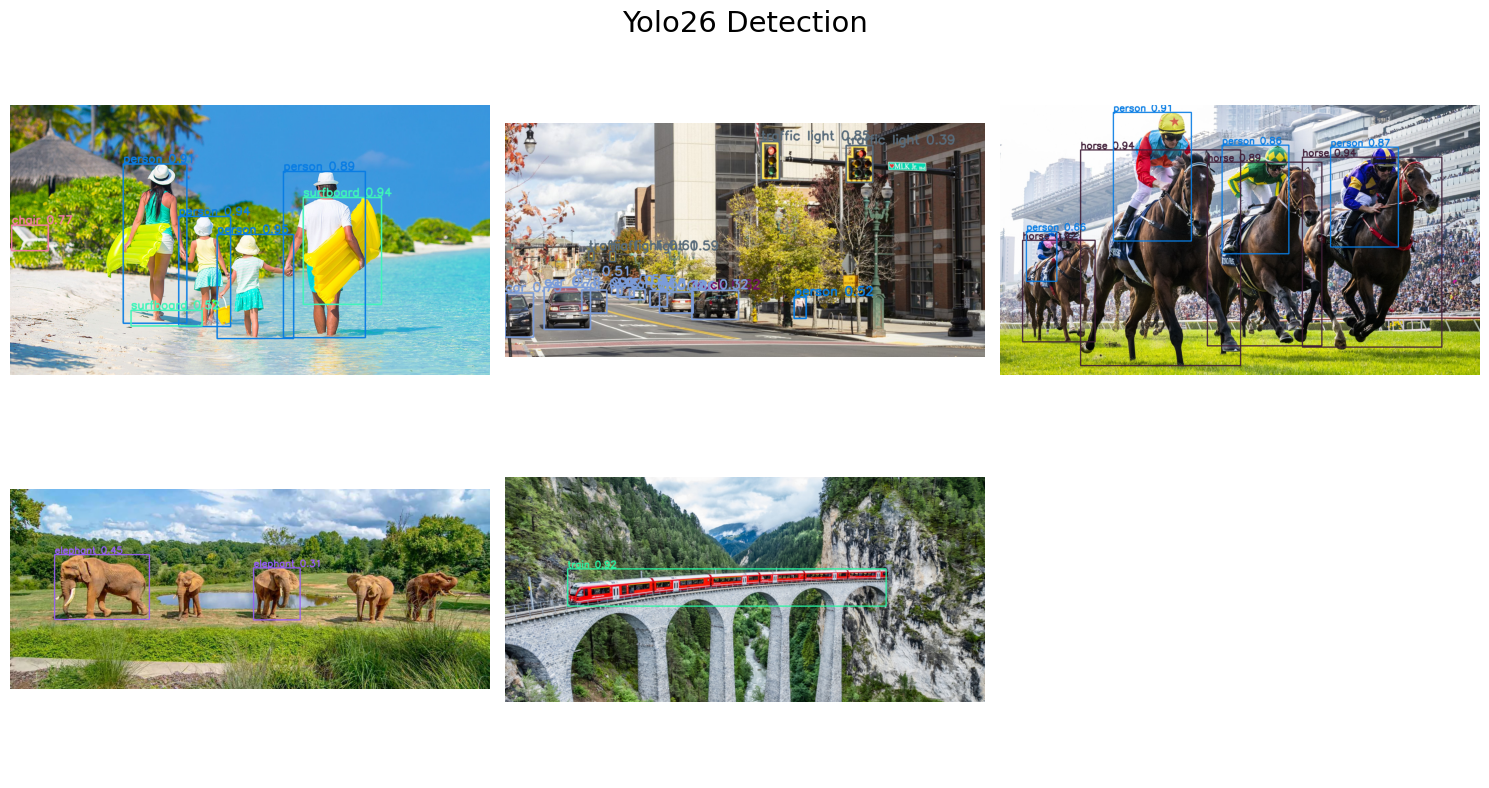

In [ ]:
# Detection
model = OnnxModel("yolo26m-seg.onnx", coco_labels, threshold=0.3, title="Yolo26 Detection")

model.detection(image_list, show_plot=True)


Model Starts Running...



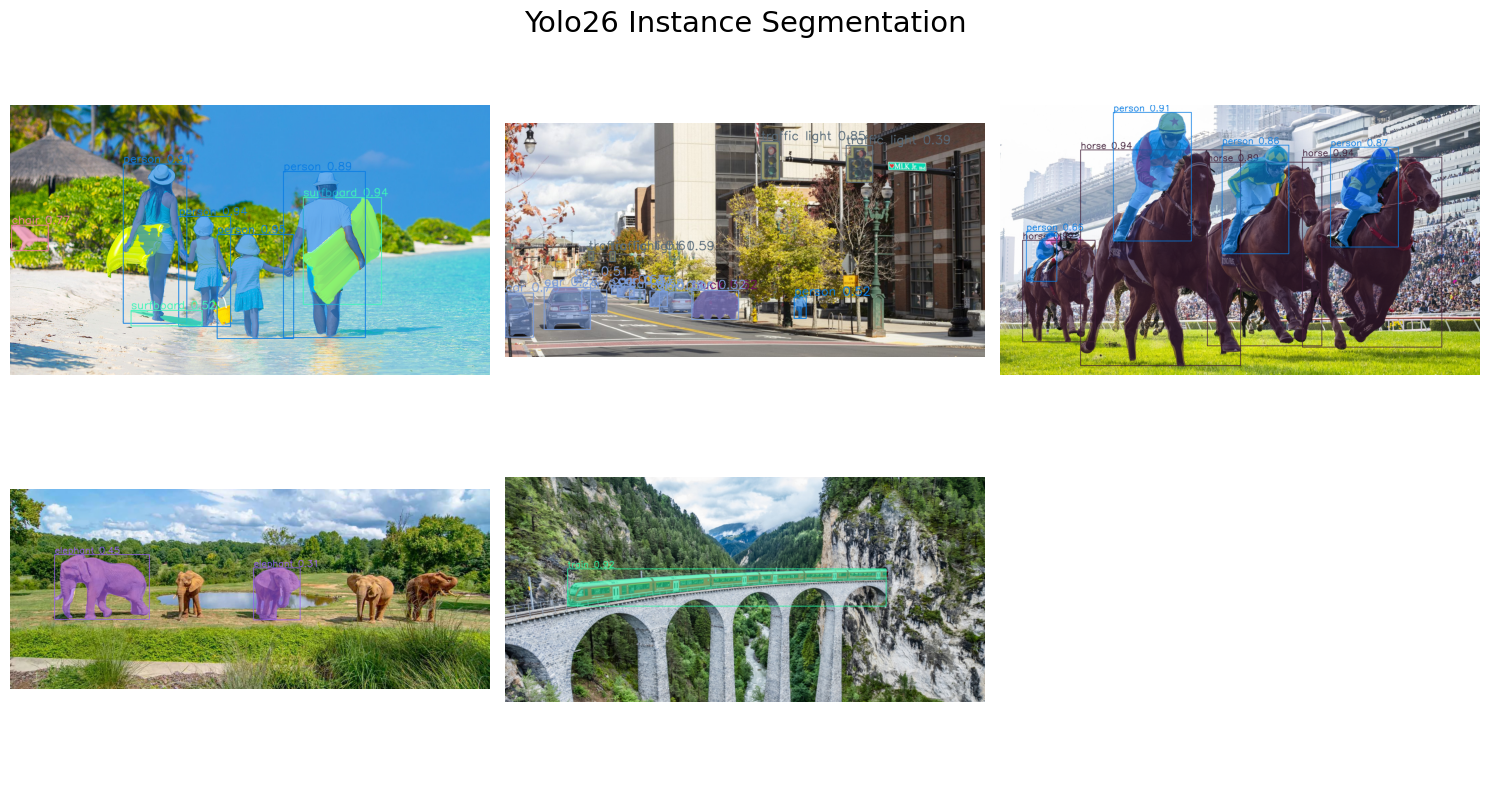

In [ ]:
# Instance Segmentation
model = OnnxModel("yolo26m-seg.onnx", coco_labels, threshold=0.25, title="Yolo26 Instance Segmentation")

model.instances(image_list, show_plot=True)


Model loaded successfully: yolo26m-seg.onnx
Available providers: ['AzureExecutionProvider', 'CPUExecutionProvider']
Using default COCO labels (80 classes)



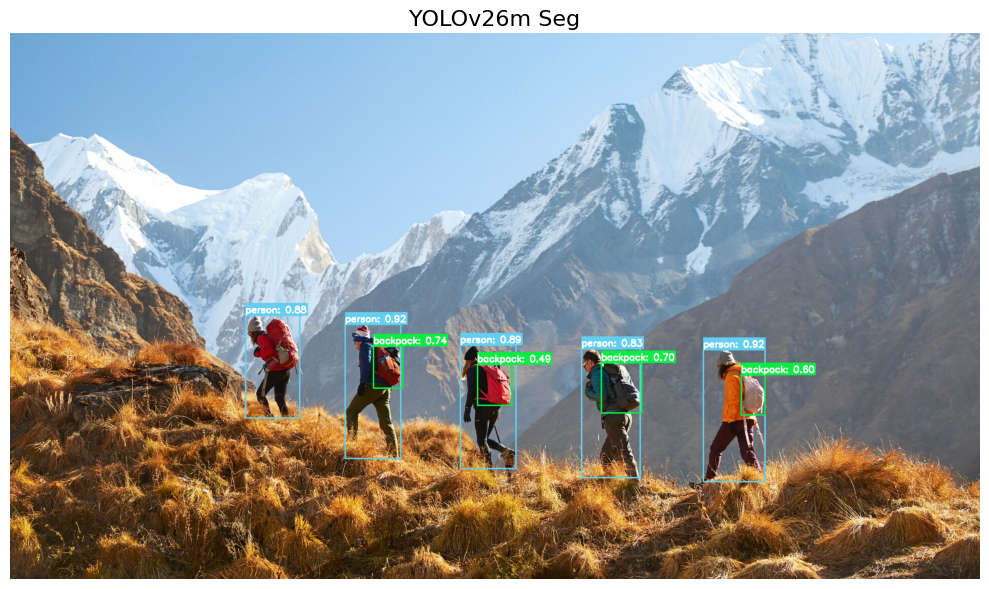

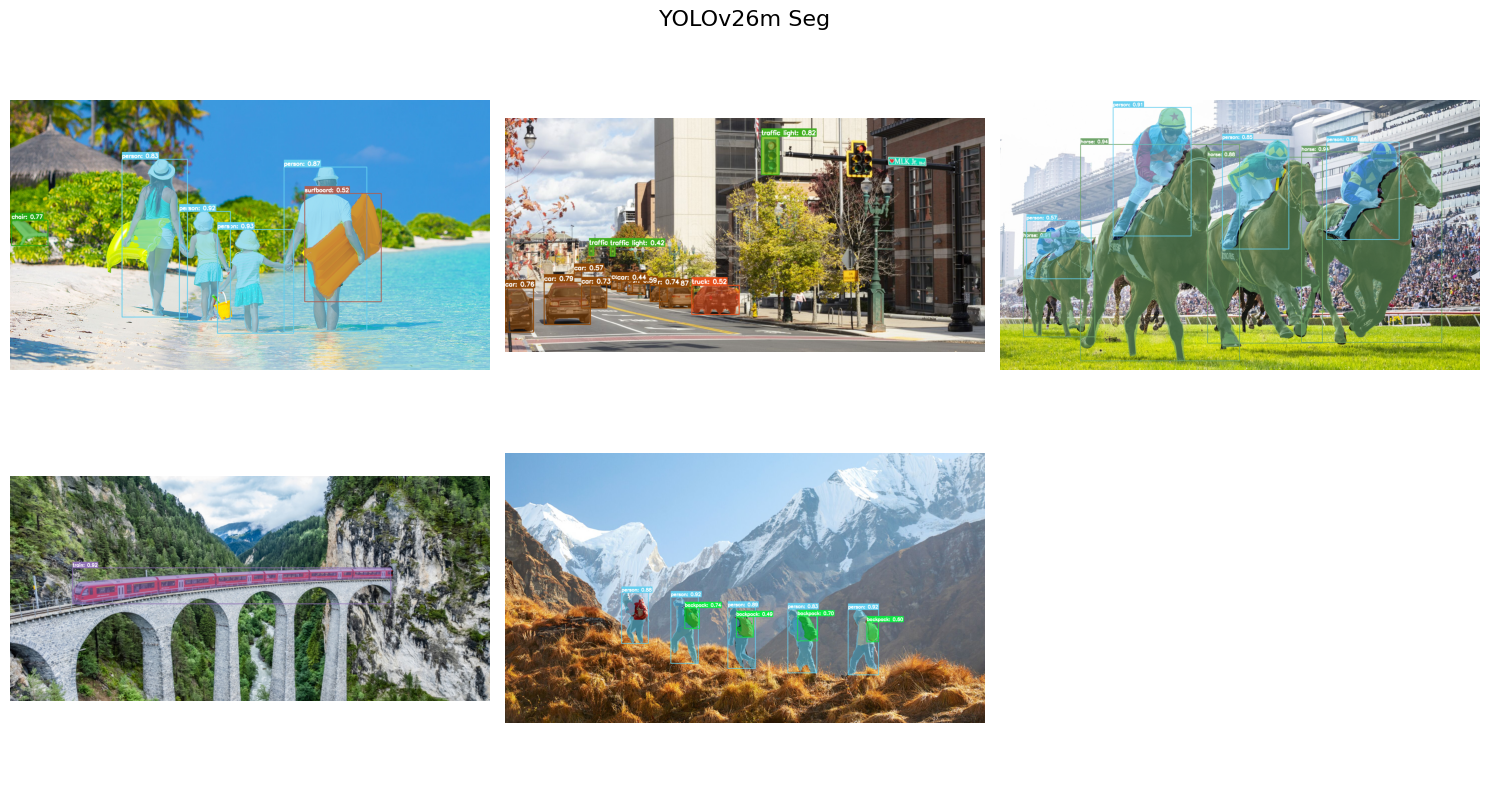

In [ ]:
from reuseUtiles import ReuseUtils

# Initialize the detector
detector = ReuseUtils( model_path=onnx_file, title="YOLOv26m Seg", conf_thres=0.4 )

# Run detection
detector.start_detection( images=test_image, mode="det", )   # Detection
print("")
detector.start_detection( images=image_list, mode="inst", )  # Instances Segm